In [120]:
import pandas as pd
import numpy as np
import seaborn as sns


In [122]:
data = pd.read_csv ('/work/Marmara.csv')
data

,date,promotion_name,promoPosition,pagetype,contentgroup_1,contentgroup_2,views,clicks,position,CTR,Type
0,2022-07-15,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,623.0,49.0,2.0,7.87,Autre
1,2022-07-14,Club Marmara Madina,Bon Plan-6,HomePage,Home,Club Marmara,4376.0,27.0,6.0,0.62,Bons Plans
2,2022-07-14,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,5947.0,355.0,2.0,5.97,Autre
3,2022-07-14,Club Marmara Pueblo Andaluz,Bon Plan-1,HomePage,Home,Club Marmara,4787.0,22.0,1.0,0.46,Bons Plans
4,2022-07-14,Majorque|Club Marmara Del Mar à partir de 499€,Home CM – bonnes affaires petites-5,HomePage,Home,Club Marmara,5947.0,64.0,5.0,1.08,Autre
...,...,...,...,...,...,...,...,...,...,...,...
2118,2021-07-01,Réservez Primo Hiver,Home CM – bonnes affaires grandes-1,HomePage,Home,Club Marmara,3840.0,86.0,1.0,2.24,Promotions
2119,2021-07-01,Majorque|Club Marmara Del Mar à partir de 629€,Home CM – bonnes affaires petites-3,HomePage,Home,Club Marmara,3838.0,61.0,3.0,1.59,Autre
2120,2021-07-01,Club Marmara Pueblo Andaluz,Bon Plan-1,HomePage,Home,Club Marmara,3445.0,40.0,1.0,1.16,Bons Plans
2121,2021-07-01,Embarquement immédiat|Envolez-vous direction n...,Home CM – bonnes affaires grandes-2,HomePage,Home,Club Marmara,3838.0,193.0,2.0,5.03,Autre


In [123]:
data['position'] = data['position'].replace({1:'position1',2:'position2',3:'position3',4:'Position4',5:'position5',6:'position6'})



In [124]:
data['Type'].unique()

array(['Autre', 'Bons Plans', 'Promotions', 'Sejour tout compris',
       'Crazy', 'Foliday', nan], dtype=object)

In [125]:
data=data.drop(columns=['promotion_name','pagetype','contentgroup_1','contentgroup_2','views','clicks'])
data

,date,promoPosition,position,CTR,Type
0,2022-07-15,Home CM – bonnes affaires grandes-2,position2,7.87,Autre
1,2022-07-14,Bon Plan-6,position6,0.62,Bons Plans
2,2022-07-14,Home CM – bonnes affaires grandes-2,position2,5.97,Autre
3,2022-07-14,Bon Plan-1,position1,0.46,Bons Plans
4,2022-07-14,Home CM – bonnes affaires petites-5,position5,1.08,Autre
...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,position1,2.24,Promotions
2119,2021-07-01,Home CM – bonnes affaires petites-3,position3,1.59,Autre
2120,2021-07-01,Bon Plan-1,position1,1.16,Bons Plans
2121,2021-07-01,Home CM – bonnes affaires grandes-2,position2,5.03,Autre


In [126]:
data=data.drop(columns=['promotion_name','pagetype','contentgroup_1','contentgroup_2','views','clicks'])


KeyError: "['promotion_name' 'pagetype' 'contentgroup_1' 'contentgroup_2' 'views'\n 'clicks'] not found in axis"

In [127]:
data['log_CTR']=data['CTR'].apply(lambda x : np.log(x))
data

,date,promoPosition,position,CTR,Type,log_CTR
0,2022-07-15,Home CM – bonnes affaires grandes-2,position2,7.87,Autre,2.063058
1,2022-07-14,Bon Plan-6,position6,0.62,Bons Plans,-0.478036
2,2022-07-14,Home CM – bonnes affaires grandes-2,position2,5.97,Autre,1.786747
3,2022-07-14,Bon Plan-1,position1,0.46,Bons Plans,-0.776529
4,2022-07-14,Home CM – bonnes affaires petites-5,position5,1.08,Autre,0.076961
...,...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,position1,2.24,Promotions,0.806476
2119,2021-07-01,Home CM – bonnes affaires petites-3,position3,1.59,Autre,0.463734
2120,2021-07-01,Bon Plan-1,position1,1.16,Bons Plans,0.148420
2121,2021-07-01,Home CM – bonnes affaires grandes-2,position2,5.03,Autre,1.615420


In [128]:
data['promoPosition'].value_counts()


Home CM – bonnes affaires grandes-1    422
Home CM – bonnes affaires grandes-2    413
Home CM – bonnes affaires petites-3    381
Bon Plan-1                             193
Bon Plan-2                             186
Bon Plan-3                             151
Home CM – bonnes affaires petites-4    123
Home CM – bonnes affaires petites-5     90
Bon Plan-6                              58
Bon Plan-4                              51
Bon Plan-5                              45
Home CM – bonnes affaires petites-2      2
Name: promoPosition, dtype: int64

In [129]:
#feature engineering
data.date=pd.to_datetime(data.date,errors='coerce')
data['jour']=data.date.dt.day_name()
data['mois']=data.date.dt.month_name()
data=data.rename(columns={'Type':'type_banniere'})
data

,date,promoPosition,position,CTR,type_banniere,log_CTR,jour,mois
0,2022-07-15,Home CM – bonnes affaires grandes-2,position2,7.87,Autre,2.063058,Friday,July
1,2022-07-14,Bon Plan-6,position6,0.62,Bons Plans,-0.478036,Thursday,July
2,2022-07-14,Home CM – bonnes affaires grandes-2,position2,5.97,Autre,1.786747,Thursday,July
3,2022-07-14,Bon Plan-1,position1,0.46,Bons Plans,-0.776529,Thursday,July
4,2022-07-14,Home CM – bonnes affaires petites-5,position5,1.08,Autre,0.076961,Thursday,July
...,...,...,...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,position1,2.24,Promotions,0.806476,Thursday,July
2119,2021-07-01,Home CM – bonnes affaires petites-3,position3,1.59,Autre,0.463734,Thursday,July
2120,2021-07-01,Bon Plan-1,position1,1.16,Bons Plans,0.148420,Thursday,July
2121,2021-07-01,Home CM – bonnes affaires grandes-2,position2,5.03,Autre,1.615420,Thursday,July


In [ ]:
data=data.drop(columns=['date','promoPosition'])


In [88]:
data


,date,promoPosition,position,CTR,type_banniere,log_CTR,jour,mois
0,2022-07-15,Home CM – bonnes affaires grandes-2,position2,7.87,Autre,2.063058,Friday,July
1,2022-07-14,Bon Plan-6,position6,0.62,Bons Plans,-0.478036,Thursday,July
2,2022-07-14,Home CM – bonnes affaires grandes-2,position2,5.97,Autre,1.786747,Thursday,July
3,2022-07-14,Bon Plan-1,position1,0.46,Bons Plans,-0.776529,Thursday,July
4,2022-07-14,Home CM – bonnes affaires petites-5,position5,1.08,Autre,0.076961,Thursday,July
...,...,...,...,...,...,...,...,...
2118,2021-07-01,Home CM – bonnes affaires grandes-1,position1,2.24,Promotions,0.806476,Thursday,July
2119,2021-07-01,Home CM – bonnes affaires petites-3,position3,1.59,Autre,0.463734,Thursday,July
2120,2021-07-01,Bon Plan-1,position1,1.16,Bons Plans,0.148420,Thursday,July
2121,2021-07-01,Home CM – bonnes affaires grandes-2,position2,5.03,Autre,1.615420,Thursday,July


In [130]:
data.isna().sum()

date             8
promoPosition    8
position         8
CTR              8
type_banniere    8
log_CTR          8
jour             8
mois             8
dtype: int64

In [131]:
list_features=['position','type_banniere', 'mois']
X_cat = pd.get_dummies(data[list_features],drop_first = 1)
X_cat

,position_position1,position_position2,position_position3,position_position5,position_position6,type_banniere_Bons Plans,type_banniere_Crazy,type_banniere_Foliday,type_banniere_Promotions,type_banniere_Sejour tout compris,...,mois_December,mois_February,mois_January,mois_July,mois_June,mois_March,mois_May,mois_November,mois_October,mois_September
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2119,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2120,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2121,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [132]:

datafs=pd.concat([X_cat,data['CTR']], axis=1)

datafs

,position_position1,position_position2,position_position3,position_position5,position_position6,type_banniere_Bons Plans,type_banniere_Crazy,type_banniere_Foliday,type_banniere_Promotions,type_banniere_Sejour tout compris,...,mois_February,mois_January,mois_July,mois_June,mois_March,mois_May,mois_November,mois_October,mois_September,CTR
0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,7.87
1,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.62
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5.97
3,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.46
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,2.24
2119,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.59
2120,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.16
2121,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,5.03


In [133]:
X_cat=X_cat.rename(columns={
#'promoPosition_Bon Plan-1':'bon_plan1',
#'promoPosition_Bon Plan-2':'bon_plan2',
#'promoPosition_Bon Plan-3':'bon_plan3',
#'promoPosition_Bon Plan-4':'bon_plan4',
#'promoPosition_Bon Plan-5':'bon_plan5',
#'promoPosition_Bon Plan-6':'bon_plan6',

#'promoPosition_Home CM – bonnes affaires grandes-1':'CM–bon_affai_grandes-1',
#'promoPosition_Home CM – bonnes affaires grandes-2':'CM–bon_affai_grandes-2',
#'promoPosition_Home CM – bonnes affaires petites-2':'CM–bon_affai_petites-2',
#'promoPosition_Home CM – bonnes affaires petites-3':'CM–bon_affai_petites-3',
#'promoPosition_Home CM – bonnes affaires petites-4':'CM–bon_affai_petites-4',
#'promoPosition_Home CM – bonnes affaires petites-5':'CM–bon_affai_petites-5',
'position_position1':'position1',
'position_position2':'position2',
'position_position3':'position3',
'position_position4':'position4',
'position_position5':'position5',
'position_position6':'position6',

'type_banniere_Autre':'Autre',
'type_banniere_Bons Plans':'Bons plan',
'type_banniere_Crazy':'Crazy',
'type_banniere_Foliday':'Foliday',
'type_banniere_Promotions':'Promotions',
'type_banniere_Sejour tout compris':'Sejour tout compris',

'jour_Friday':'Friday',
'jour_Monday':'Monday',
'jour_Saturday':'Saturday',
'jour_Sunday':'Sunday',
'jour_Thursday':'Thursday',
'jour_Tuesday':'Tuesday',
'jour_Wednesday':'Wednesday',
'mois_April':'April',
'mois_August':'August',
'mois_December':'December',
'mois_February':'February',
'mois_January':'January',
'mois_July':'July',
'mois_June':'June',
'mois_March':'March',
'mois_May':'May',
'mois_November':'November',
'mois_October':'October',
'mois_September':'September'})

In [134]:
x=X_cat
x


,position1,position2,position3,position5,position6,Bons plan,Crazy,Foliday,Promotions,Sejour tout compris,...,December,February,January,July,June,March,May,November,October,September
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2119,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2120,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2121,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [136]:
X_train=X.loc[data.date<='2022-07-01']
y_train= y.loc[data.date<='2022-07-01']

X_test = X.loc[data.date>'2022-07-01']
y_test = y.loc[data.date>'2022-07-01']

# transform target variables
from sklearn.preprocessing import MinMaxScaler
target_scaler = MinMaxScaler()


print("X_train shape :", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape :", y_train.shape)
print("y_test shape :", y_test.shape)

X_train shape : (1994, 21)
X_test shape : (121, 21)
y_train shape : (1994,)
y_test shape : (121,)


# Other transformation

In [135]:
# define the target transform wrapper   datafs
from sklearn.compose import TransformedTargetRegressor

# example of normalizing input and output variables for regression.
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
# load data
dataset = datafs
# split into inputs and outputs
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]
y=y.fillna(2.37)
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

Mean MAE: 0.704


In [ ]:
# split into inputs and outputs
X, y = dataset[:, :-1], dataset[:, -1]
# prepare the model with input scaling
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', HuberRegressor())])
# prepare the model with target scaling
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())
# evaluate model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# convert scores to positive
scores = absolute(scores)
# summarize the result
s_mean = mean(scores)
print('Mean MAE: %.3f' % (s_mean))

In [138]:
!pip install statsmodels==0.13.2


You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [137]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [139]:
#print the intercept
print(model.intercept_)

0.9650650884313159


In [140]:
coeff_parameter = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
position1,2.302880
position2,1.211517
position3,0.888965
position5,0.007115
position6,1.126355
Bons plan,-1.550370
Crazy,-0.894845
Foliday,-0.529013
Promotions,-0.560155
Sejour tout compris,6.395132


In [141]:
predictions = model.predict(X_test)
predictions

array([2.96137825, 1.32584597, 2.96137825, 2.50237153, 1.75697641,
       2.6388271 , 0.20660601, 3.49258682, 1.74986175, 1.08845669,
       1.41100785, 1.41100785, 0.20660601, 3.49258682, 1.75697641,
       2.6388271 , 2.96137825, 1.41100785, 1.75697641, 2.50237153,
       2.96137825, 1.74986175, 2.6388271 , 2.96137825, 3.49258682,
       0.19949134, 1.32584597, 2.96137825, 1.75697641, 2.6388271 ,
       3.49258682, 2.96137825, 0.20660601, 2.50237153, 1.08845669,
       2.6388271 , 1.41100785, 0.20660601, 1.32584597, 2.6388271 ,
       2.50237153, 1.08845669, 2.96137825, 1.74986175, 1.75697641,
       1.41100785, 3.49258682, 0.19949134, 2.96137825, 3.49258682,
       1.75697641, 1.08845669, 0.19949134, 2.6388271 , 1.32584597,
       2.50237153, 1.41100785, 1.08845669, 1.32584597, 3.49258682,
       2.96137825, 2.50237153, 1.41100785, 1.75697641, 2.6388271 ,
       0.19949134, 1.41100785, 2.50237153, 1.32584597, 0.20660601,
       2.96137825, 3.49258682, 2.6388271 , 1.75697641, 1.75697

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CTR'>

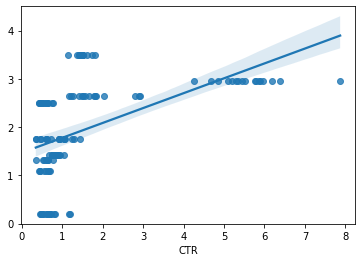

In [142]:
sns.regplot(y_test,predictions)


In [143]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTR   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     535.6
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:50:55   Log-Likelihood:                -2762.4
No. Observations:                1994   AIC:                             5569.
Df Residuals:                    1972   BIC:                             5692.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

# Test d'homoscidasité

In [144]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [71]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

In [145]:
#https://www.statology.org/breusch-pagan-test-python/

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(ls.resid, ls.model.exog)

lzip(names, test)



[('Lagrange multiplier statistic', 315.74560902862663),
 ('p-value', 1.963646927074323e-54),
 ('f-value', 17.667176321907792),
 ('f p-value', 1.0213142343710131e-59)]

### nous constatons qu'il y a une hétéroscédasticité -->ce critère n'est pas vérifier pour remédier à ce probleme nous allons Utiliser la régression pondérée

# Test de shapiro wilk

In [146]:
from scipy.stats import shapiro
stat, p = shapiro(datafs)
stat
p


/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


1.0

Nous remarquons que la normalité est vérifieé

In [148]:
  from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(ls.resid)

2.1252510997416745

La statistique de test est  de 2,12 . Étant donné que cela se situe dans la plage de 1,5 et 2,5, nous considérons que l'autocorrélation n'est pas problématique dans ce modèle de régression.

In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor


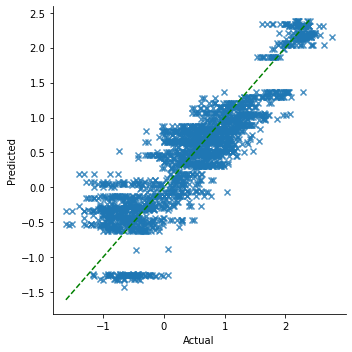

MAE 0.3222253982471655
MAPE 4640450123103.476
MSE :  0.16772411952901642


In [78]:

# Get predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

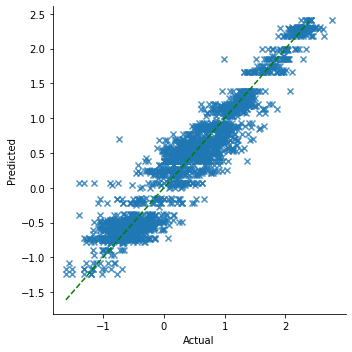

MAE 0.20464799030842556
MAPE 5168811435868.321
MSE :  0.07161249569941197


In [79]:
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

# Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

df_results_train = pd.DataFrame({'Actual': y_train , 'Predicted': y_train_pred})
df_results_test = pd.DataFrame({'Actual': y_test , 'Predicted': y_test_pred})
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_train, fit_reg=False, markers = "x")
d_line= np.arange(df_results_train.min().min(), df_results_train.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")


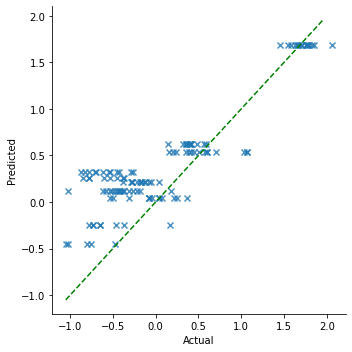

MAE 0.20464799030842556
MAPE 5168811435868.321
MSE :  0.07161249569941197


In [80]:
# with position MSE :  0.29
# Prediction vs Actual plot
sns.lmplot(x='Actual', y='Predicted', data=df_results_test, fit_reg=False, markers = "x")
d_line= np.arange(df_results_test.min().min(), df_results_test.max().max())
plt.plot(d_line, d_line, color='green', linestyle='--')
plt.show()

# Show Metrics
print(f"MAE {mean_absolute_error(y_train, y_train_pred)}")
print(f"MAPE {mean_absolute_percentage_error(y_train, y_train_pred)}")
print(f"MSE :  {mean_squared_error(y_train, y_train_pred)}")

<BarContainer object of 27 artists>

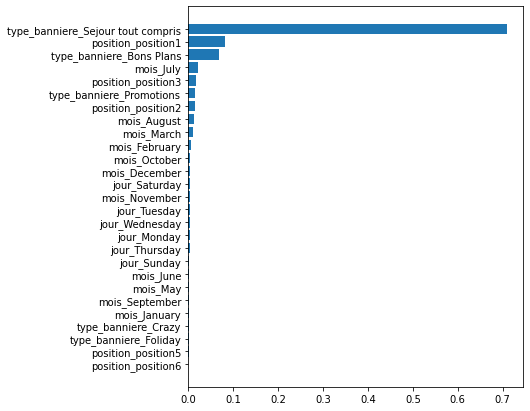

In [ ]:
plt.figure(figsize = (6,7))
importances = pd.DataFrame({"features" : X_train.columns,
                            "importance" : reg.feature_importances_}).sort_values("importance")

plt.barh(importances.features, importances.importance)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17c78468-df45-44b7-9d10-8043693c30e4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>